In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Загрузка данных из файла в таблицу.

In [22]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Квартиры.csv',
               encoding='cp1251', sep=';')
df

,Номер примера,Количество комнат,Общая площадь,Жилая площадь,Тип дома,Этажность квартиры,Этажность дома,Площадь кухни,Индекс места,Минут ходьбы,Балкон / Лоджия,Цена
0,1,2,44,27,1,5,9,6,106,10,0,47000
1,2,1,35,19,1,13,16,9,88,5,1,42000
2,3,3,85,56,0,4,9,10,59,20,2,112000
3,4,4,133,74,1,1,16,20,117,30,2,136000
4,5,3,67,48,0,1,8,7,14,5,0,90000
...,...,...,...,...,...,...,...,...,...,...,...,...
1716,1717,3,79,53,2,2,14,12,62,15,0,125000
1717,1718,2,43,29,0,2,5,6,114,5,0,38000
1718,1719,2,44,27,0,2,5,6,103,15,2,45000
1719,1720,1,32,20,1,1,5,6,102,20,0,31000


Проверка распределения данных

array([[<Axes: title={'center': 'Номер примера'}>,
        <Axes: title={'center': 'Количество комнат'}>,
        <Axes: title={'center': 'Общая площадь'}>],
       [<Axes: title={'center': 'Жилая площадь'}>,
        <Axes: title={'center': 'Тип дома'}>,
        <Axes: title={'center': 'Этажность квартиры'}>],
       [<Axes: title={'center': 'Этажность дома'}>,
        <Axes: title={'center': 'Площадь кухни'}>,
        <Axes: title={'center': 'Индекс места'}>],
       [<Axes: title={'center': 'Минут ходьбы'}>,
        <Axes: title={'center': 'Балкон / Лоджия'}>,
        <Axes: title={'center': 'Цена'}>]], dtype=object)

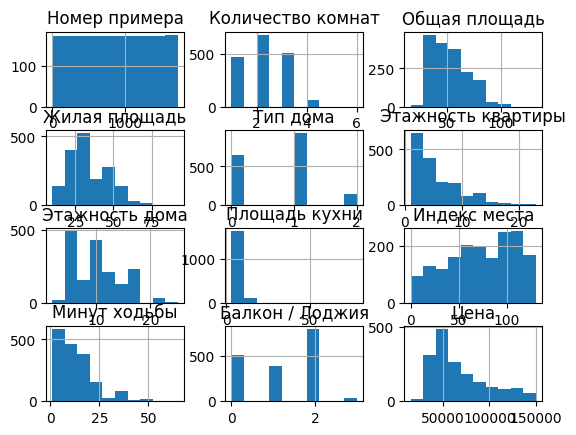

In [23]:
df.hist()

Проверка отсутствия пропусков

In [24]:
df.isna().sum()

Номер примера         0
Количество комнат     0
Общая площадь         0
Жилая площадь         0
Тип дома              0
Этажность квартиры    0
Этажность дома        0
Площадь кухни         0
Индекс места          0
Минут ходьбы          0
Балкон / Лоджия       0
Цена                  0
dtype: int64

Выбор входных и выходных столбцов

In [25]:
input=df.iloc[:,1:11]
output=df.iloc[:,11:]
print(input)
print(output)

      Количество комнат  Общая площадь  Жилая площадь  Тип дома  \
0                     2             44             27         1   
1                     1             35             19         1   
2                     3             85             56         0   
3                     4            133             74         1   
4                     3             67             48         0   
...                 ...            ...            ...       ...   
1716                  3             79             53         2   
1717                  2             43             29         0   
1718                  2             44             27         0   
1719                  1             32             20         1   
1720                  4             82             58         0   

      Этажность квартиры  Этажность дома  Площадь кухни  Индекс места  \
0                      5               9              6           106   
1                     13              16         

Выбор обучающего и тестового множеств

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size=0.2)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
#y_test

Модель линейной регрессии

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model_linear=LinearRegression().fit(x_train, y_train)
predict_train_linear=model_linear.predict(x_train)
predict_test_linear=model_linear.predict(x_test)
mae_train=mean_absolute_error(y_train[:,0], predict_train_linear[:,0])
mae_test=mean_absolute_error(y_test[:,0], predict_test_linear[:,0])
print('МАЕ на обучающем множестве', mae_train)
print('МАЕ на тестовом множестве', mae_test)

МАЕ на обучающем множестве 8281.39723087069
МАЕ на тестовом множестве 8117.140547381582


Диаграмма рассеяния

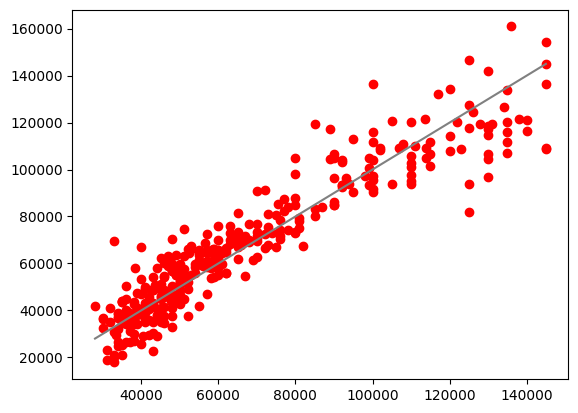

In [29]:
import matplotlib.pyplot as plt
plt.scatter(x=y_test, y=predict_test_linear, c='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='grey')
plt.xlabel='реальные цены'
plt.ylabel='предсказанные цены'
plt.show()

Нейронная сеть.
Нормализация данных

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler_x=MinMaxScaler() #новый объект нормализатора мин-макс для входных данных
scaler_x.fit(x_train) #высчитывает параметры нормализации на обучающем множестве
x_train_norm=scaler_x.transform(x_train) #нормализует обучащающее множество (входные столбцы)
x_test_norm=scaler_x.transform(x_test) #нормализует тестовое множество (входные столбцы)

scaler_y=MinMaxScaler() #новый объект нормализатора мин-макс для выходных данных
scaler_y.fit(y_train)
y_train_norm=scaler_y.transform(y_train)
y_test_norm=scaler_y.transform(y_test)

#y_train_norm

array([[0.37777778],
       [0.38992593],
       [0.19259259],
       ...,
       [0.2962963 ],
       [0.5       ],
       [0.7037037 ]])

Строим и обучаем сеть

In [36]:
from sklearn.neural_network import MLPRegressor
model1 = MLPRegressor(hidden_layer_sizes=100, #количество нейронов в скрытых слоях (послойно)
                      max_iter=500, #максимальное количество эпох
                      activation='logistic', #активационная функция
                      tol=0.0001, #параметр остановки (предельное снижение ошибки)
                      verbose=True #подавать признаки жизни
                      ).fit(x_train_norm, y_train_norm)
predict_train_norm=model1.predict(x_train_norm)
predict_train=scaler_y.inverse_transform(predict_train_norm.reshape(-1,1))
predict_test_norm=model1.predict(x_test_norm)
predict_test=scaler_y.inverse_transform(predict_test_norm.reshape(-1,1))

mae_train=mean_absolute_error(y_train[:,0], predict_train[:,0])
mae_test=mean_absolute_error(y_test[:,0], predict_test[:,0])
print('МАЕ на обучающем множестве', mae_train)
print('МАЕ на тестовом множестве', mae_test)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.21990813
Iteration 2, loss = 0.05855159
Iteration 3, loss = 0.02725640
Iteration 4, loss = 0.03608147
Iteration 5, loss = 0.03124618
Iteration 6, loss = 0.02416541
Iteration 7, loss = 0.02392201
Iteration 8, loss = 0.02365828
Iteration 9, loss = 0.02229861
Iteration 10, loss = 0.02187079
Iteration 11, loss = 0.02120679
Iteration 12, loss = 0.02058998
Iteration 13, loss = 0.02005364
Iteration 14, loss = 0.01949937
Iteration 15, loss = 0.01893609
Iteration 16, loss = 0.01838718
Iteration 17, loss = 0.01784337
Iteration 18, loss = 0.01731707
Iteration 19, loss = 0.01679359
Iteration 20, loss = 0.01627409
Iteration 21, loss = 0.01577062
Iteration 22, loss = 0.01526329
Iteration 23, loss = 0.01479941
Iteration 24, loss = 0.01431943
Iteration 25, loss = 0.01385447
Iteration 26, loss = 0.01340596
Iteration 27, loss = 0.01297693
Iteration 28, loss = 0.01256185
Iteration 29, loss = 0.01214071
Iteration 30, loss = 0.01175458
Iteration 31, loss = 0.01138368
Iteration 32, los